#Activity Score and Transformations

An Activity Score variable was created furthur used for Linear Regression
Multiple transofrmations such as Log, Min Max Scaling was applied to seek information from the data.

In [ ]:
#### Initalizing libraries.

import warnings
import pandas as pd
warnings.filterwarnings("ignore")
#pip install config
import json
import requests
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
#import config  #note use pip install config if this gives an error
from termcolor import colored
import threading
import time
import seaborn as sns
import math
import seaborn as sns
from matplotlib import pyplot as plt

### Authorize to mount Google drive
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Capstone Project./Datasets')

#Reading 10 years data for Test Repositories
Dataset=pd.read_csv('Pivot_Dataset.csv')
Dataset.shape


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(47672, 15)

In [ ]:
### Preprocessing

Dataset['Total_count'] = Dataset['Total_count'].fillna(0)
Dataset['Activity_Score']=0
list_300=Dataset['repoID'].unique().tolist()
Dataset.drop('Unnamed: 0' ,axis=1,inplace=True)

### Creating an Activity Score variable

Dataset_WAS=pd.DataFrame()
for i in range(0, len(list_300)):
  sub_df = Dataset.loc[(Dataset['repoID'] == list_300[i])]
  for j in range(5,len(sub_df)):
    Avg = sub_df['Total_count'].iloc[j-5:j-1,].mean()
    diff = sub_df['Total_count'].iloc[j] - Avg
    if Avg==0 and diff==0:
      sub_df['Activity_Score'].iloc[j]= 0
    elif Avg==0 and diff>0:
      sub_df['Activity_Score'].iloc[j]= 1
    else:
      sub_df['Activity_Score'].iloc[j]= round((diff/Avg), 3)
  Dataset_WAS=Dataset_WAS.append(sub_df, ignore_index=True)


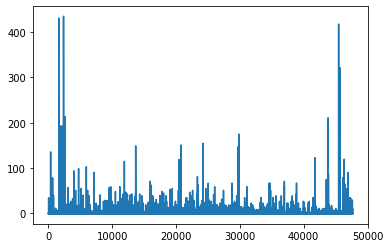

In [ ]:
###Checking the distribution of the Activity Score
Dataset_WAS['Activity_Score'].describe()

###Plot
Dataset_WAS['Activity_Score'].plot()

### Saving the dataset
Dataset_WAS.to_csv('Dataset_Activity_Score_LR.csv')


In [ ]:
### PREPROCESSING

## Checking for null values
df=Dataset_WAS
df.isnull().sum()

## Dropping NA values
df1 = df
df1 = df1.dropna()
df1.info()

## Dropping columns
df2 = df1
df2.drop(['Total_count', 'year', 'month', 'day', 'datetime', 'repoID', 'Status'], axis=1, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46213 entries, 5 to 47670
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             46213 non-null  object 
 1   year                 46213 non-null  int64  
 2   month                46213 non-null  int64  
 3   day                  46213 non-null  int64  
 4   number_of_pushes     46213 non-null  float64
 5   number_of_forks      46213 non-null  float64
 6   number_of_pulls      46213 non-null  float64
 7   number_of_bookmarks  46213 non-null  float64
 8   number_of_issues     46213 non-null  float64
 9   issue_comment_count  46213 non-null  float64
 10  CreateEvent_count    46213 non-null  float64
 11  Total_count          46213 non-null  float64
 12  Status               46213 non-null  float64
 13  repoID               46213 non-null  int64  
 14  Activity_Score       46213 non-null  float64
dtypes: float64(10), int64(4), object(1)


<Figure size 720x720 with 0 Axes>

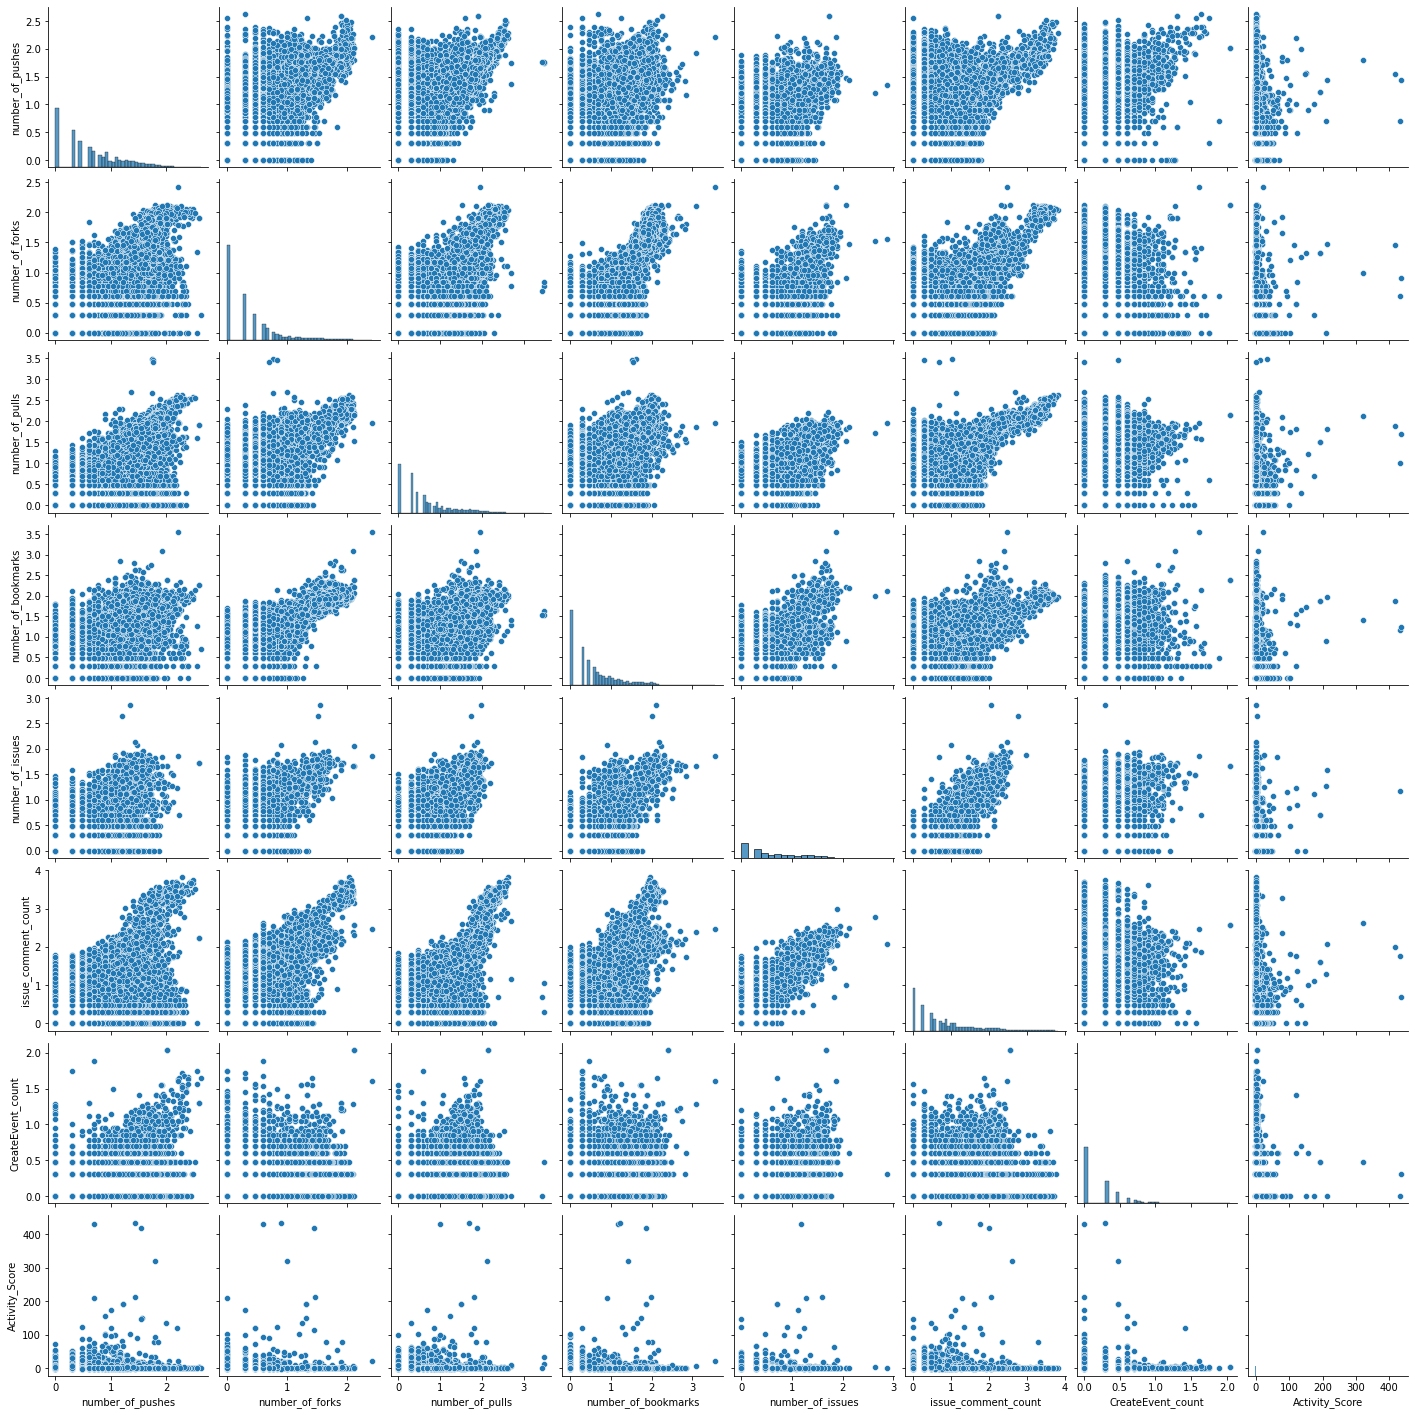

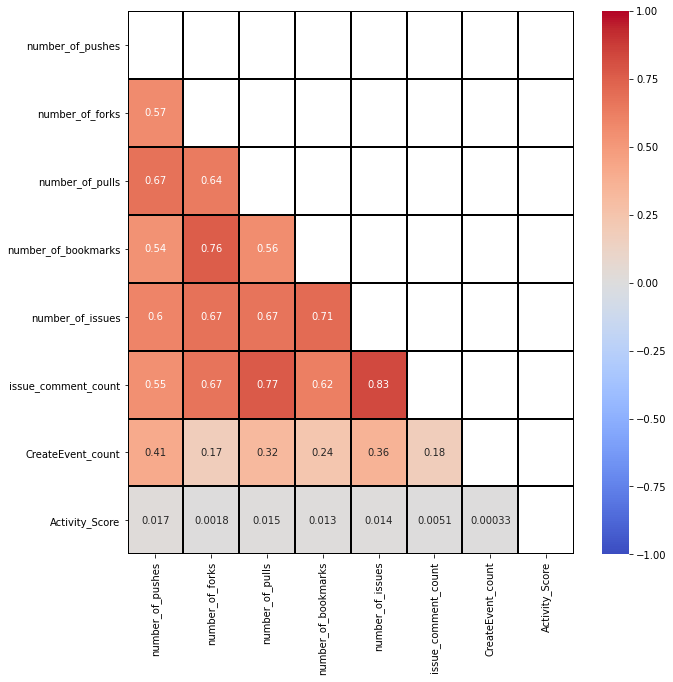

In [ ]:
### Visualization of the Data (Without any Transformation)

# Seaborn visualization library
# Create the default pairplot
plt.figure(figsize=(10,10))
sns.pairplot(df2)

### Correlation Matrix
matrix = np.triu(df2.corr())
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black', mask=matrix)

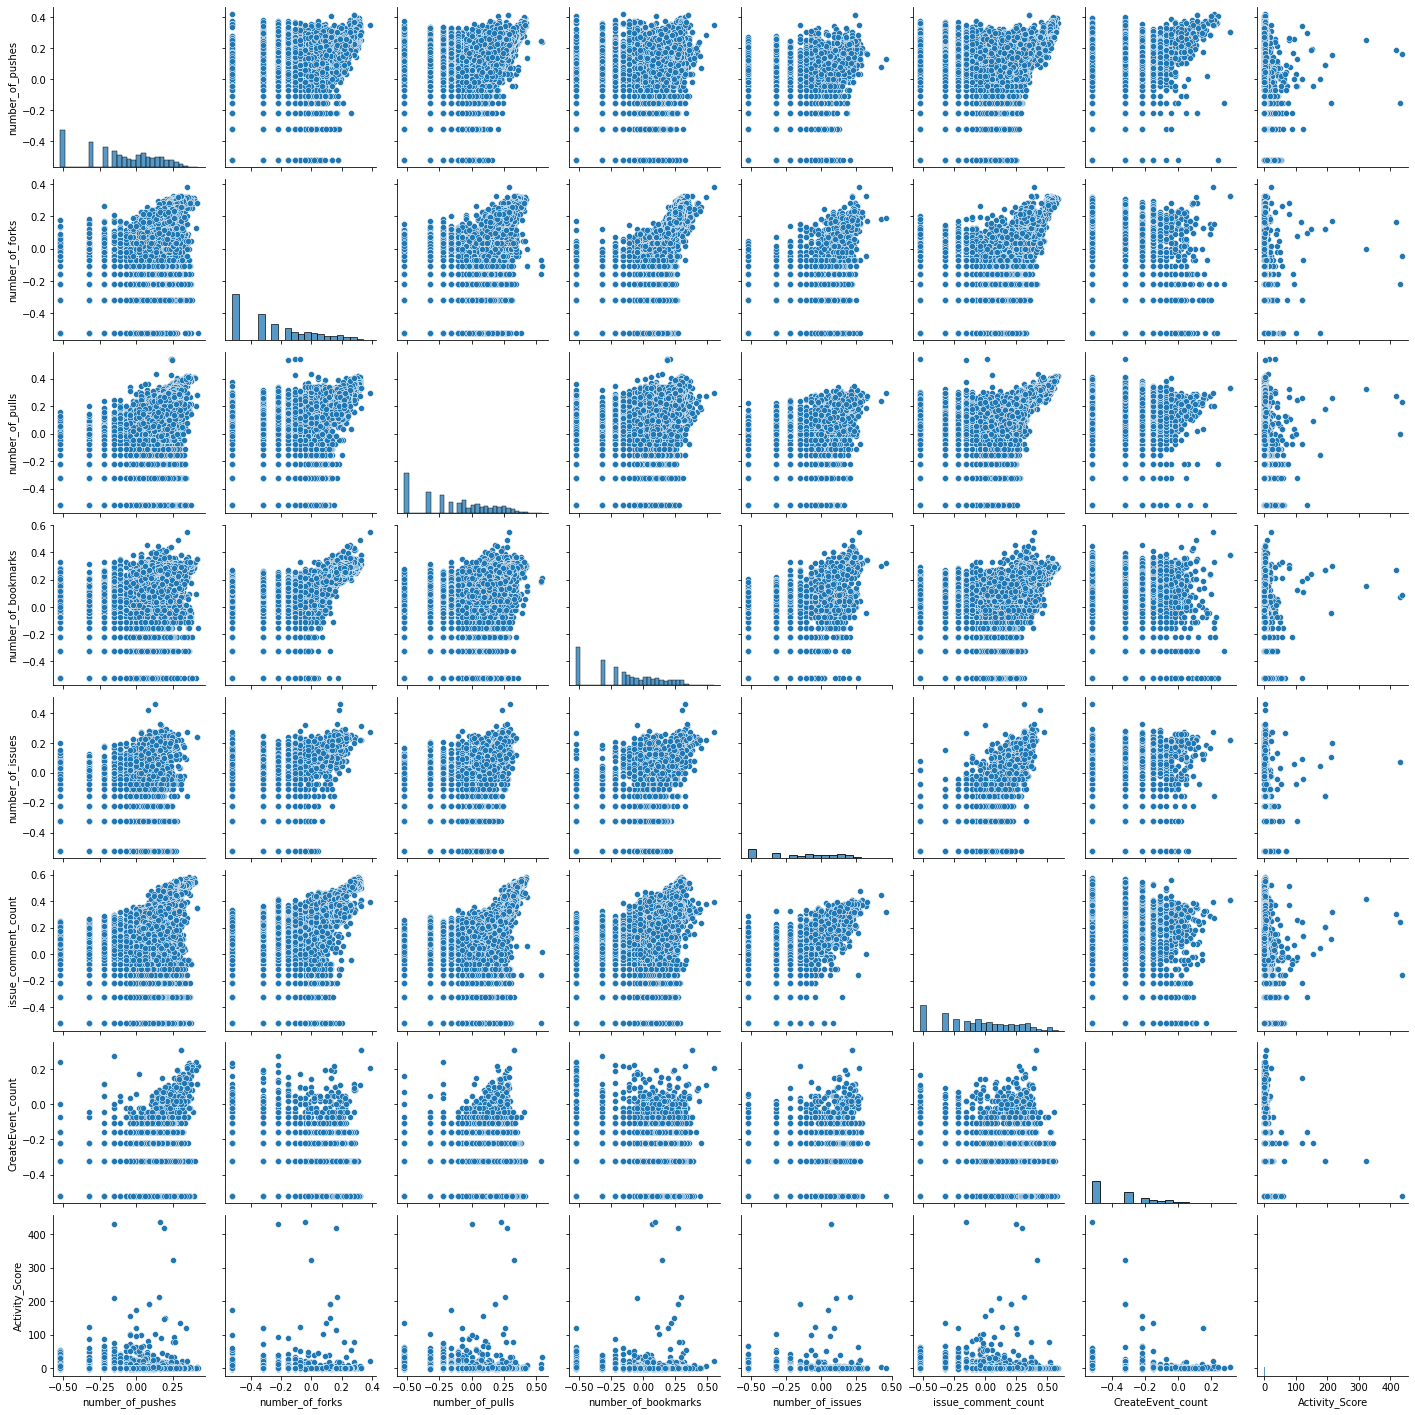

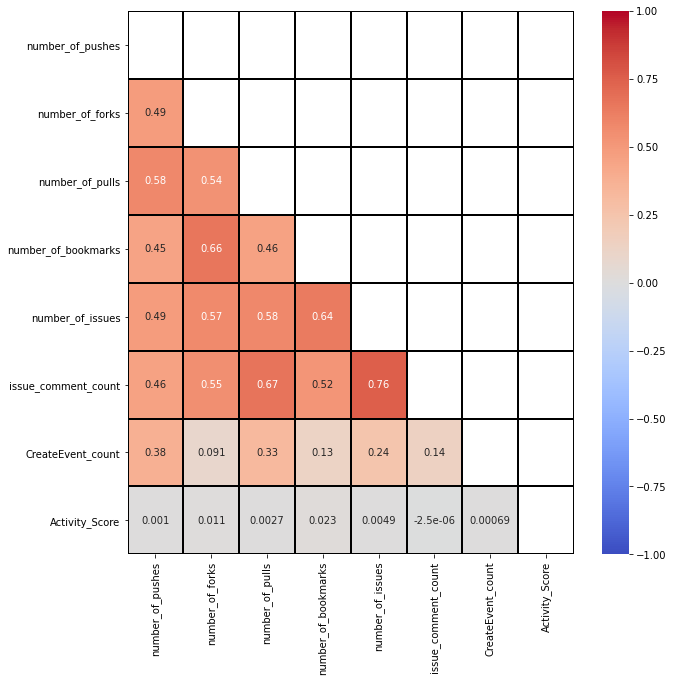

In [ ]:
### Applying Log Transofrm 

df3 = df2
Columns = df3.columns
Columns = list(Columns)
Columns.remove('Activity_Score')
df3[Columns] = np.log10(df3[Columns])

if df3.columns.all() in Columns:
  df3.apply(lambda x: np.log10(x))

#Removing negative infinity and NaN values
df3.replace([np.inf, -np.inf], np.nan, inplace=True)
df3.fillna(0)

### Visualzing the log tranformation plot

## Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(df3)

### Matrix Correlation of Log Transform variables
matrix = np.triu(df3.corr())
plt.figure(figsize=(10,10))
sns.heatmap(df3.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black', mask=matrix)

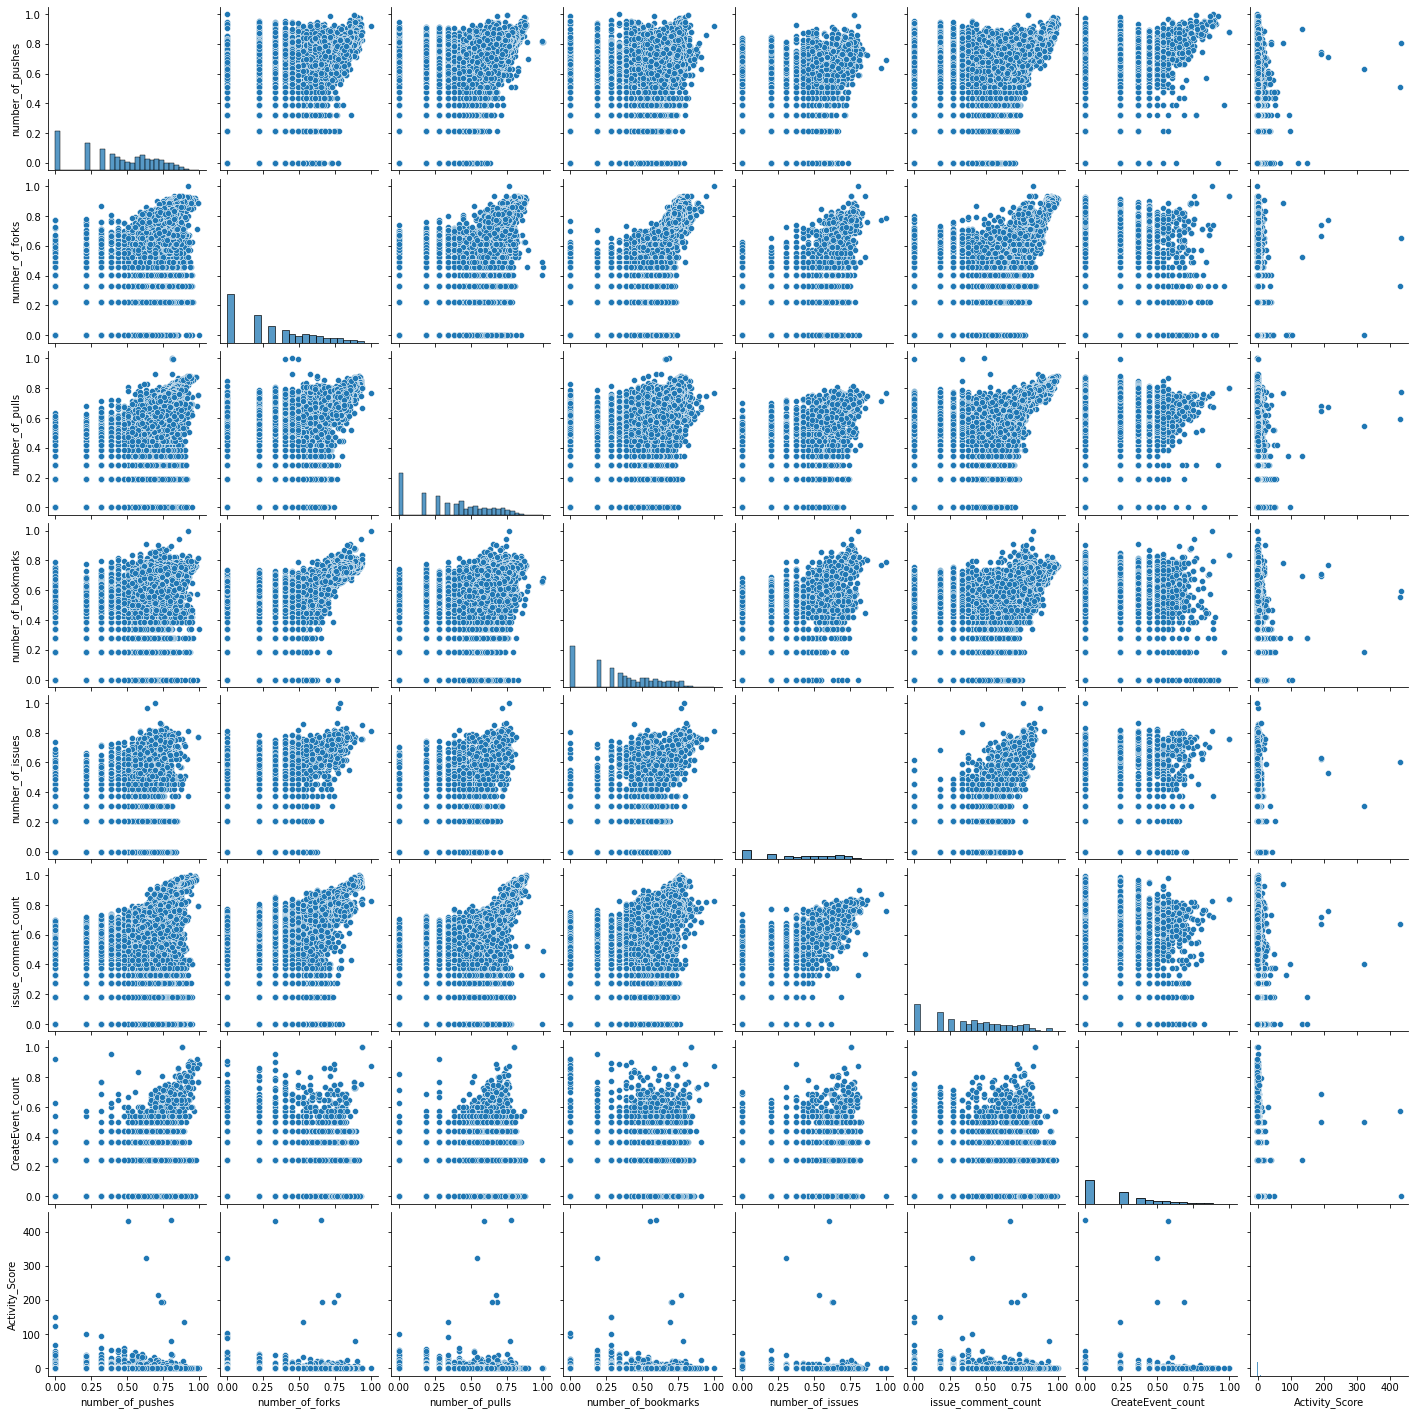

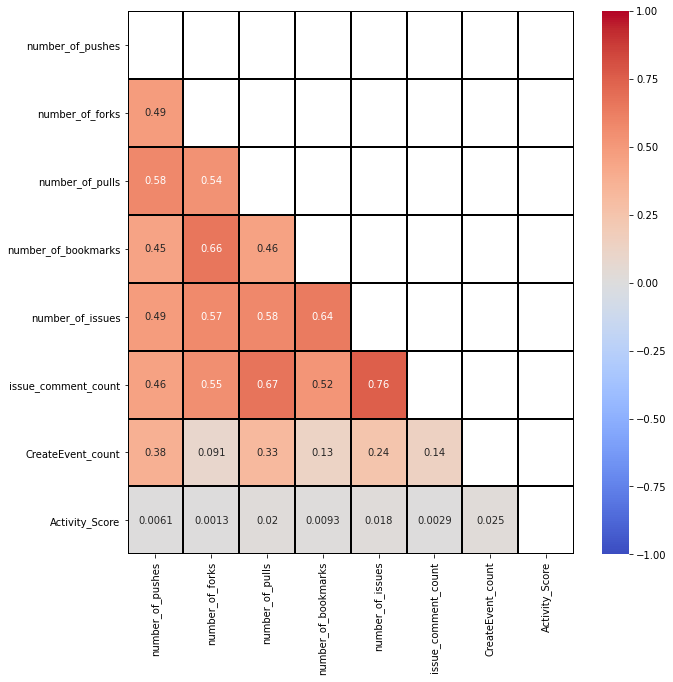

In [ ]:
### Applying MinMax Scaling transform on the Varibles

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

df5 = df2
d = scaler.fit_transform(df5[Columns])
df5 = pd.DataFrame(d, columns=Columns)

d = scaler.fit_transform(df[Columns], df["Activity_Score"])

m_columns = Columns+["Activity_Score"]

for col in m_columns:
  if col in Columns:
    df5[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df5[col])),columns=[col])
  else:
    df5[col] = df2[col]

df5.fillna(0)

### Visualizing the MinMax Scaled Dataset
sns.pairplot(df5)

### Correlation plot of Min Max Scaled Dataset
matrix = np.triu(df5.corr())
plt.figure(figsize=(10,10))
sns.heatmap(df5.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black', mask=matrix)

(array([11532.,  2180.,  1174.,  1128.,  2778.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 5 Patch objects>)

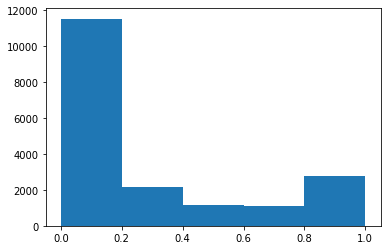

In [ ]:
### Checking distribution of Activity Score

plt.hist(df2["Activity_Score"], bins=[0,0.2,0.4,0.6,0.8,1])